In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!wget https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip

--2025-06-25 11:56:33--  https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip
Resolving bitbucket.org (bitbucket.org)... 104.192.142.25, 104.192.142.24, 104.192.142.26, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.142.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105946856 (101M) [application/zip]
Saving to: ‘fruits.zip’

fruits.zip          100%[===================>] 101.04M  17.1MB/s    in 6.0s    

2025-06-25 11:56:41 (16.9 MB/s) - ‘fruits.zip’ saved [105946856/105946856]



In [3]:
!unzip fruits.zip

Archive:  fruits.zip
   creating: fruits/
  inflating: __MACOSX/._fruits       
  inflating: fruits/.DS_Store        
  inflating: __MACOSX/fruits/._.DS_Store  
   creating: fruits/test/
   creating: fruits/train/
   creating: fruits/validation/
   creating: fruits/test/apple/
  inflating: fruits/test/.DS_Store   
  inflating: __MACOSX/fruits/test/._.DS_Store  
   creating: fruits/test/banana/
   creating: fruits/test/orange/
   creating: fruits/train/apple/
  inflating: fruits/train/.DS_Store  
  inflating: __MACOSX/fruits/train/._.DS_Store  
   creating: fruits/train/banana/
   creating: fruits/train/orange/
   creating: fruits/validation/apple/
  inflating: fruits/validation/.DS_Store  
  inflating: __MACOSX/fruits/validation/._.DS_Store  
   creating: fruits/validation/banana/
   creating: fruits/validation/orange/
  inflating: fruits/test/apple/Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflating: __MACOSX/fruits/test/apple/._Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflatin

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
tf.__version__

'2.18.0'

In [6]:
img_height, img_width = 32, 32
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 460 files belonging to 3 classes.
Found 66 files belonging to 3 classes.
Found 130 files belonging to 3 classes.


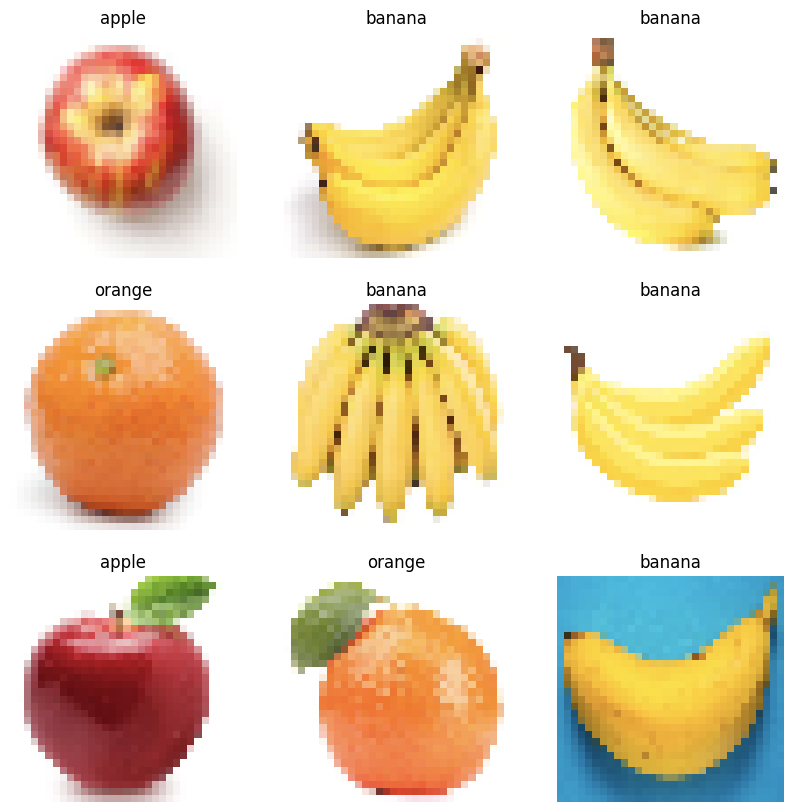

In [7]:
class_names = ["apple", "banana", "orange"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [8]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(64, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(128, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="softmax"),
     tf.keras.layers.Dense(3)
    ]
)

In [9]:
model.compile(
    optimizer="rmsprop",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [10]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 20
)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.3024 - loss: 1.0989 - val_accuracy: 0.4545 - val_loss: 1.0974
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - accuracy: 0.3842 - loss: 1.0962 - val_accuracy: 0.3333 - val_loss: 1.0807
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.4609 - loss: 1.0748 - val_accuracy: 0.5455 - val_loss: 1.0313
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.5697 - loss: 1.0242 - val_accuracy: 0.5303 - val_loss: 1.0109
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 0.5634 - loss: 1.0071 - val_accuracy: 0.6970 - val_loss: 0.9722
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.7600 - loss: 0.9572 - val_accuracy: 0.6667 - val_loss: 0.9420
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.7698 - loss: 0.9264 - val_accuracy: 0.7727 - val_loss: 0.9070
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 0.8333 - loss: 0.8849 - val_accuracy: 0.

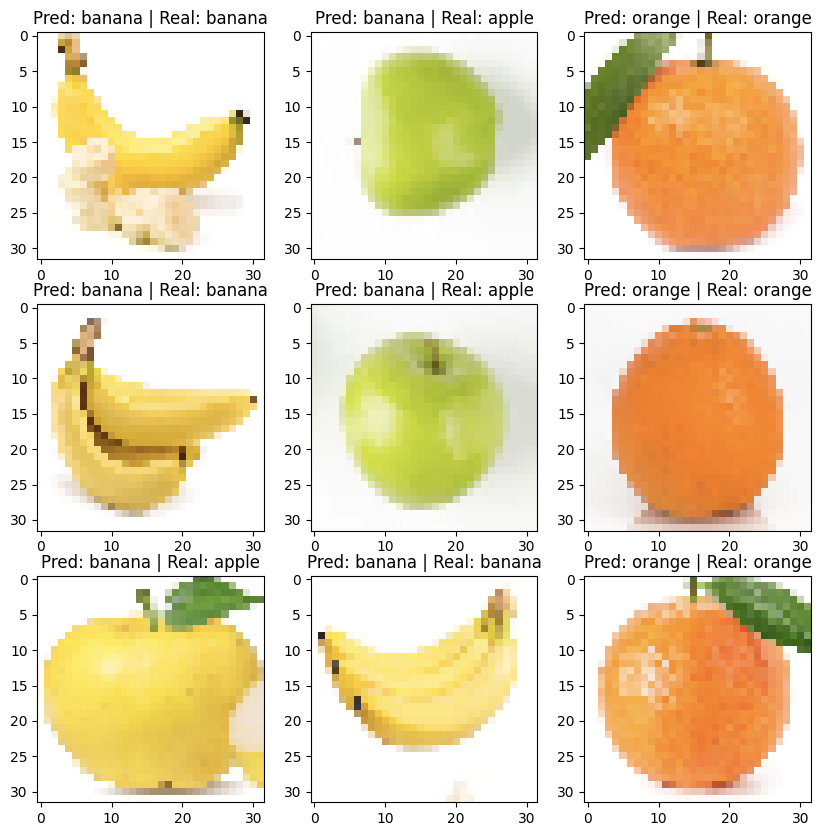

In [11]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [12]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)

Saved artifact at '/tmp/tmpo9mnsn33'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  134870393045456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134870393050448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134870393050640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134870393051600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134870393051024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134870393052560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134870393052944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134870393053904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134870393054288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134870393055248: TensorSpec(shape=(), dtype=tf.resource, name=None)
